# Fintech - Part 2


In [3]:
import yfinance as yf
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt


In [20]:
def get_yahoo_finance_data(ticker: str, start_date: str = None, end_date: str = None):
    # Create a ticker object
    stock = yf.Ticker(ticker)
    
    # Fetch historical market data
    hist = stock.history(period="max", start=start_date, end=end_date)
    
    # Return the data
    return hist

# Example usage
ticker = '^GSPC'  # Apple Inc. ticker symbol
data = get_yahoo_finance_data(ticker)

# Display the data
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-31 00:00:00-04:00,5505.589844,5551.509766,5493.750000,5522.299805,4546910000,0.0,0.0
2024-08-01 00:00:00-04:00,5537.839844,5566.160156,5410.419922,5446.680176,4703620000,0.0,0.0
2024-08-02 00:00:00-04:00,5376.629883,5383.890137,5302.029785,5346.560059,5156450000,0.0,0.0


# Todo 
- check which market
- lag between feature and gold price, tell a story behind every feature, to explain the lag
- INDEXCBOE VIX
- Analyist's notes, Gutner, ...

In [21]:
tickers = {
    "S&P500": "^GSPC",
    "Crude Oil": "CL=F",
    "Silver": "SI=F",
    "Iron": "TIO=F",
    "NIFTY 50": "^NSEI",
    "NYSE Composite": "^NYA",
    "Candian Dollar": "CNY=X",
    "Euro": "EUR=X",
    "VIX": "^VIX",
    "Gold": "GC=F"
}


In [22]:
dfs = {
    name: get_yahoo_finance_data(ticker) for name, ticker in tickers.items()
}

# Convert indices to date-only format and find the intersection of all dates
common_dates = set.intersection(*(set(df.index.date) for df in dfs.values()))

# Find the earliest common date
earliest_common_date = min(common_dates)

print(f"The earliest common date is: {earliest_common_date}")

# Filter dataframes to the common date range
dfs = {name: df.loc[str(earliest_common_date):] for name, df in dfs.items()}

The earliest common date is: 2010-10-14


In [23]:
print([dfs[key].head(5)["Close"] for key in tickers.keys()])

[Date
2010-10-14 00:00:00-04:00    1173.810059
2010-10-15 00:00:00-04:00    1176.189941
2010-10-18 00:00:00-04:00    1184.709961
2010-10-19 00:00:00-04:00    1165.900024
2010-10-20 00:00:00-04:00    1178.170044
Name: Close, dtype: float64, Date
2010-10-14 00:00:00-04:00    82.690002
2010-10-15 00:00:00-04:00    81.250000
2010-10-18 00:00:00-04:00    83.080002
2010-10-19 00:00:00-04:00    79.489998
2010-10-20 00:00:00-04:00    81.769997
Name: Close, dtype: float64, Date
2010-10-14 00:00:00-04:00    24.417000
2010-10-15 00:00:00-04:00    24.271999
2010-10-18 00:00:00-04:00    24.396999
2010-10-19 00:00:00-04:00    23.764000
2010-10-20 00:00:00-04:00    23.848000
Name: Close, dtype: float64, Date
2010-10-14 00:00:00-04:00    148.789993
2010-10-15 00:00:00-04:00    146.000000
2010-10-18 00:00:00-04:00    143.070007
2010-10-19 00:00:00-04:00    140.919998
2010-10-20 00:00:00-04:00    142.880005
Name: Close, dtype: float64, Date
2010-10-14 00:00:00+05:30    6177.350098
2010-10-15 00:00:00+05

**Gold price data**


In [25]:
for name, df in dfs.items():
    df.index = df.index.date
    dfs[name] = df

We decided to concentarte on the Close price between 2010-2014.

In [26]:
combined_df = pd.DataFrame(index=dfs["S&P500"].index)
rel_column = "Close"

for feature, df in dfs.items():
    combined_df[f"{feature}_{rel_column}"] = df['Close']
    # print(df['Close'])
combined_df.index = pd.DatetimeIndex(combined_df.index)

combined_df

,S&P500_Close,Crude Oil_Close,Silver_Close,Iron_Close,NIFTY 50_Close,NYSE Composite_Close,Candian Dollar_Close,Euro_Close,VIX_Close,Gold_Close
2010-10-14,1173.810059,82.690002,24.417000,148.789993,6177.350098,7546.589844,6.6560,0.71596,19.879999,1376.699951
2010-10-15,1176.189941,81.250000,24.271999,146.000000,6062.649902,7520.600098,6.6434,0.71063,19.030001,1371.099976
2010-10-18,1184.709961,83.080002,24.396999,143.070007,6075.950195,7571.100098,6.6310,0.71611,19.090000,1371.199951
2010-10-19,1165.900024,79.489998,23.764000,140.919998,6027.299805,7423.649902,6.6342,0.71757,20.629999,1335.099976
2010-10-20,1178.170044,81.769997,23.848000,142.880005,5982.100098,7523.810059,6.6346,0.72785,19.790001,1343.300049
...,...,...,...,...,...,...,...,...,...,...
2024-07-31,5522.299805,77.910004,28.778000,105.940002,24951.150391,18710.009766,7.2507,0.92455,16.360001,2426.500000
2024-08-01,5446.680176,76.309998,28.330999,102.830002,25010.900391,18493.230469,7.2172,0.92388,18.590000,2435.000000
2024-08-02,5346.560059,73.519997,28.246000,104.000000,24717.699219,18162.259766,7.2428,0.92699,23.389999,2425.699951
2024-08-05,5186.330078,72.940002,27.076000,104.180000,24055.599609,17725.179688,7.1572,0.91652,38.570000,2401.699951


We drop rows with NaN values to ensure the data is clean for statistical calculations.

<Axes: >

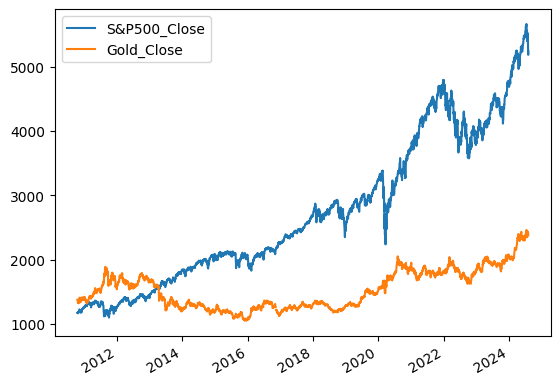

In [30]:
combined_df[["S&P500_Close", "Gold_Close"]].plot()

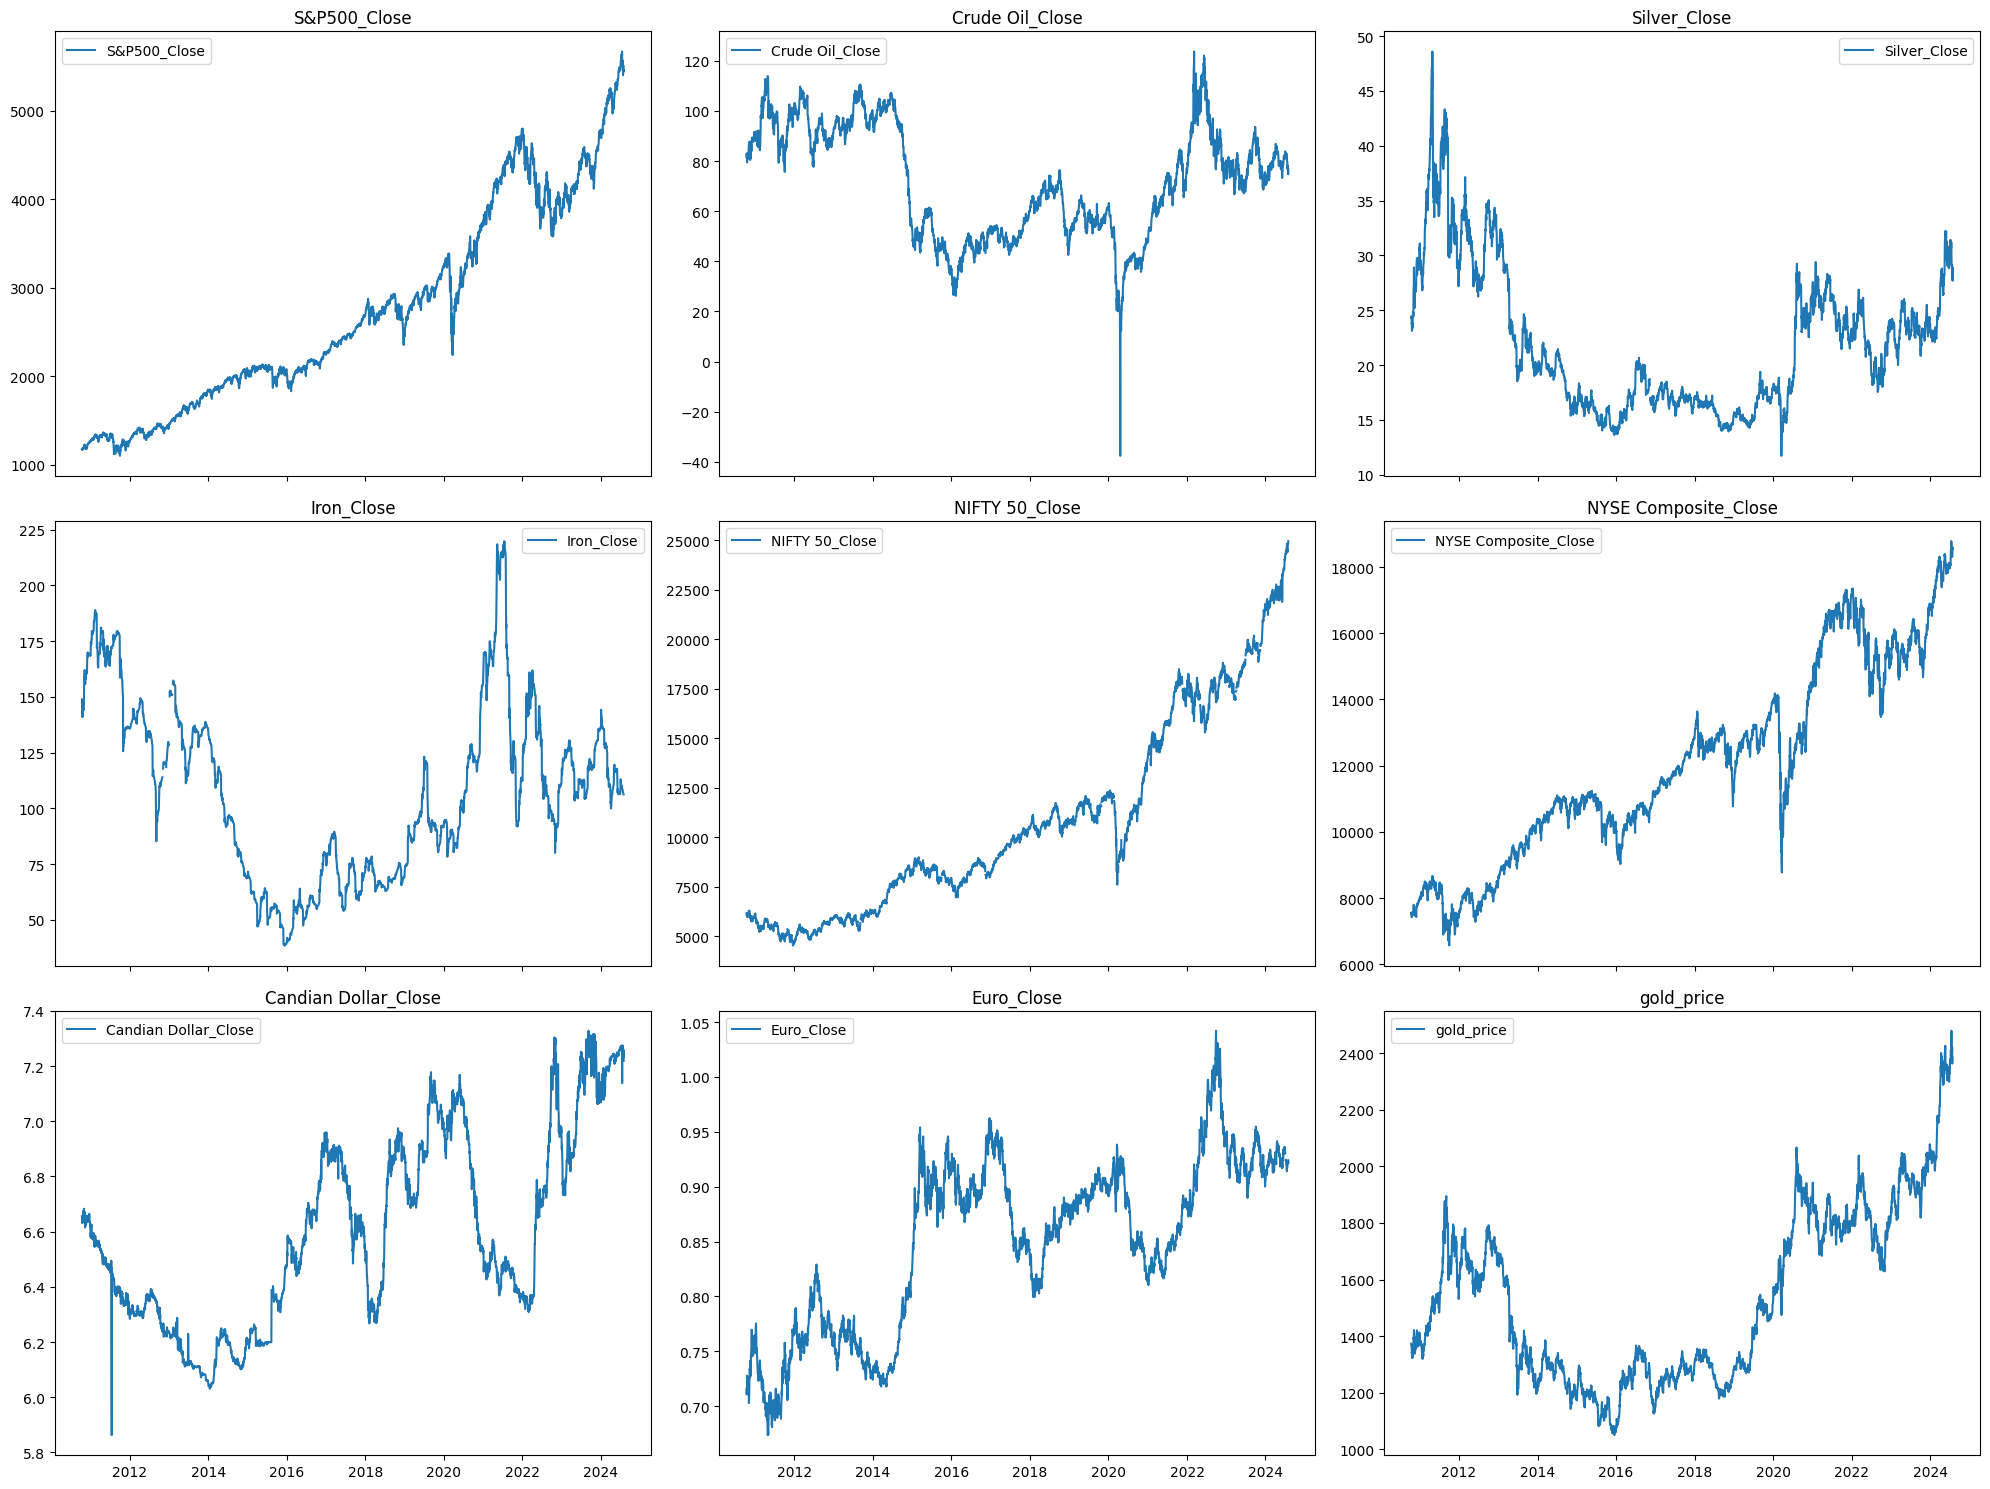

In [18]:
fig, axs = plt.subplots(3, 3, figsize=(20, 15), sharex=True)

# Flatten the 3x3 array of axes for easy iteration
axs = axs.flatten()

# Plot each column in a subplot
for i, col in enumerate(combined_df.columns):
    axs[i].plot(combined_df.index, combined_df[col], label=col)
    axs[i].set_title(col)
    axs[i].legend()

# Hide any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# The Correlation Matrix of our features' prices

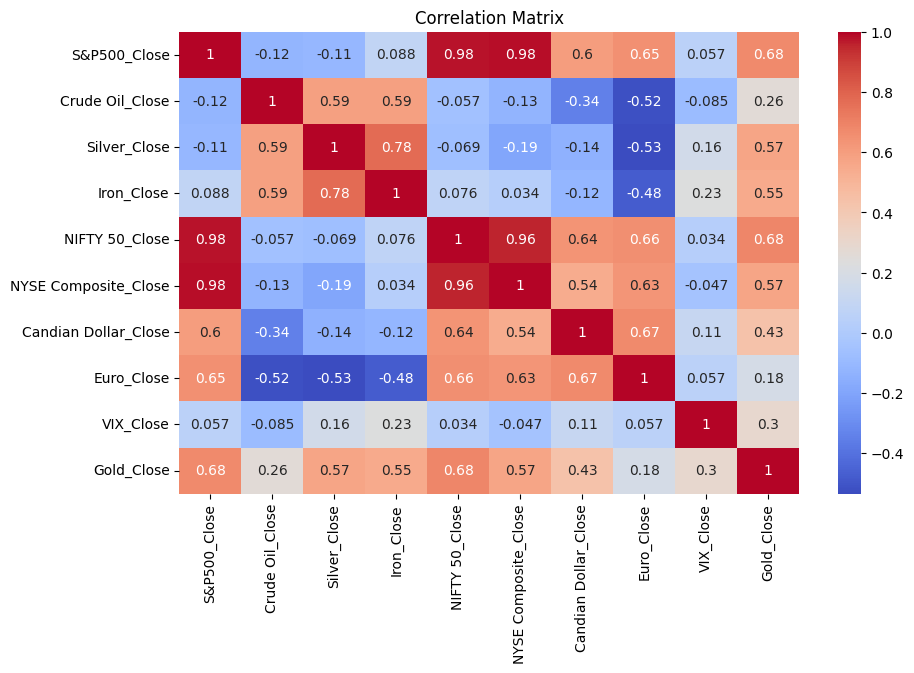

In [28]:
correlation_matrix = combined_df.corr()

# Plotting the Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Mean and Standard deviation

In [10]:
combined_stats = combined_df.describe().loc[['mean', 'std']]
combined_stats

,S&P500_Close,Crude Oil_Close,Silver_Close,Iron_Close,NIFTY 50_Close,NYSE Composite_Close,Candian Dollar_Close,Euro_Close,gold_price
mean,2726.843472,71.686555,21.968238,107.445096,10865.460298,12054.880933,6.597127,0.850251,1531.883506
std,1144.513267,22.193270,6.352190,38.860585,4953.390336,2937.375941,0.342992,0.076998,302.158241


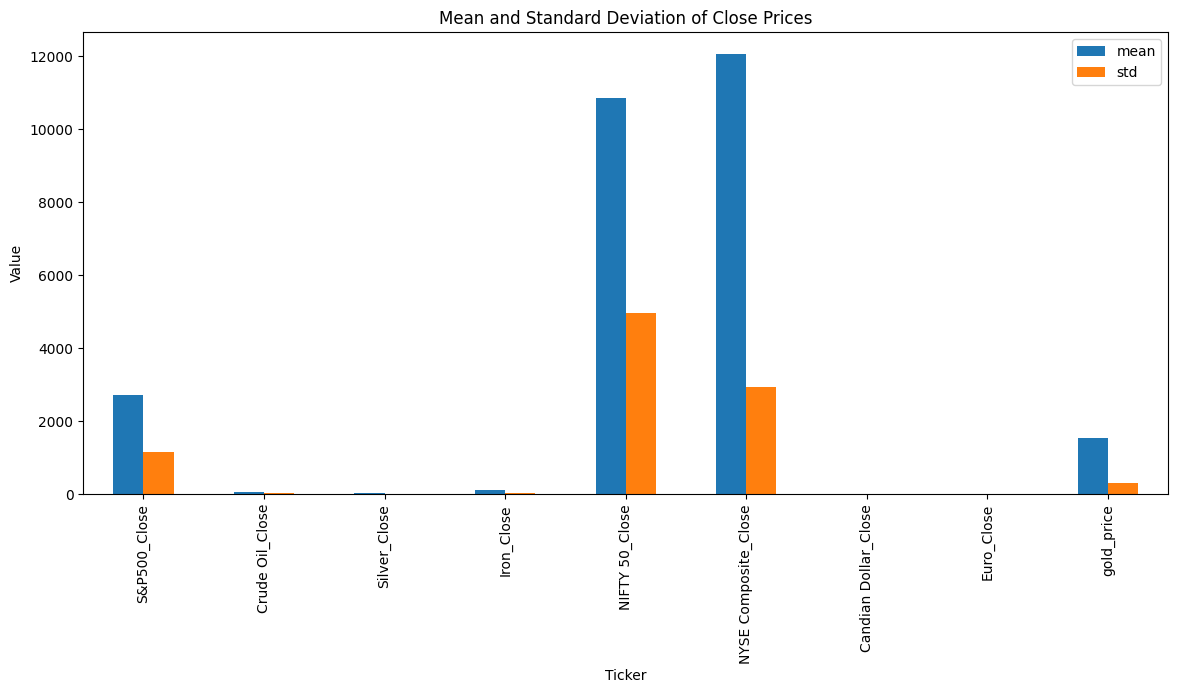

In [11]:
combined_stats.T.plot(kind='bar', figsize=(14, 6), title='Mean and Standard Deviation of Close Prices')
plt.xlabel('Ticker')
plt.ylabel('Value')
plt.show()

# Detect outliers using IQR method
We identify outliers as data points where 'Close' prices are below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

In [19]:
def detect_outliers_iqr(df):
    outliers_dict = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_dict[column] = outliers
    return outliers_dict

outliers_dict = detect_outliers_iqr(combined_df)
for column, outliers in outliers_dict.items():
    print(f"\nOutliers for {column} using IQR method:")
    print(outliers)
    print(f'{column} has {len(outliers)} outliers')


Outliers for S&P500_Close using IQR method:
Empty DataFrame
Columns: [S&P500_Close, Crude Oil_Close, Silver_Close, Iron_Close, NIFTY 50_Close, NYSE Composite_Close, Candian Dollar_Close, Euro_Close, gold_price]
Index: []
S&P500_Close has 0 outliers

Outliers for Crude Oil_Close using IQR method:
            S&P500_Close  Crude Oil_Close  Silver_Close  Iron_Close  \
2020-04-20   2823.159912       -37.630001        15.556       84.43   

            NIFTY 50_Close  NYSE Composite_Close  Candian Dollar_Close  \
2020-04-20     9261.849609          11003.879883                7.0722   

            Euro_Close  gold_price  
2020-04-20     0.92022      1686.2  
Crude Oil_Close has 1 outliers

Outliers for Silver_Close using IQR method:
            S&P500_Close  Crude Oil_Close  Silver_Close  Iron_Close  \
2011-04-05   1332.630005       108.339996     39.174999  173.179993   
2011-04-06   1335.540039       108.830002     39.383999  175.000000   
2011-04-07   1333.510010       110.300003     3

**We can see that :**

1. S&P 500 (S&P500_Close) : 
    No outliers detected.
    

2. Oil (Crude Oil_Close):

    Outlier detected on 2020-04-20 with a negative price of -37.63 USD. This date is significant as it reflects the     unprecedented event when oil prices turned negative due to oversupply and storage issues during the COVID-19       pandemic.
    
    
3. Silver (Silver_Close):

    Outliers detected mostly between April 2011 and September 2011. This period saw a significant rise in silver       prices, peaking around April 2011, which was followed by high volatility.
    
    
4. Iron (Iron_Close):
    No outliers detected.
    
    
5. NYSE Composite (NYSE Composite_Close):
    No outliers detected.


6. Canadian Dollar (Candian Dollar_Close):
    No outliers detected.


7. Euro (Euro_Close):
    No outliers detected.


8. Gold (gold_price): 
    No outliers detected.